In [1]:
import numpy as np
import pandas as pd
import os
import glob
import csv
import random
# from scipy.special import softmax
# Visualization
import matplotlib.pyplot as plt
from pycaret.regression import *

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
csv_paths = os.listdir("data")
csv_paths = [path for path in csv_paths if "driving_small_motion" in path]
train_sub = [f"subject{i}_" for i in range(16)]
test_sub = [f"subject{i}_" for i in range(16, 20)]

train_csv = []
test_csv = []
for sub_n in test_sub:
    for path in csv_paths:
        if sub_n in path:
            test_csv.append(path)

for sub_n in train_sub:
    for path in csv_paths:
        if sub_n in path:
            train_csv.append(path)

In [4]:
train_data = []
for csv_path in train_csv:
    f = open("data/" + csv_path)
    rdr = csv.reader(f)
    next(rdr)
    for data in rdr:
        train_data.append(data[1:-1])
        
test_data = []
for csv_path in test_csv:
    f = open("data/" + csv_path)
    rdr = csv.reader(f)
    next(rdr)
    for data in rdr:
        test_data.append(data[1:-1])
        
random.shuffle(train_data)        
random.shuffle(test_data)

In [5]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)  # only difference

In [6]:
er_train = []
er_test = []
for data in train_data:
    # SNR 사용한 가중치합
    _hr = np.array(data[1:6], dtype='float32')
    _snr = softmax(np.array(data[7:12], dtype = 'float32'))
    est = sum(_hr*_snr)
    gt = float(data[0])
    er_train.append(abs(est-gt))

for data in test_data:
    # SNR 사용한 가중치합
    _hr = np.array(data[1:6], dtype='float32')
    _snr = softmax(np.array(data[7:12], dtype = 'float32'))
    est = sum(_hr*_snr)
    gt = float(data[0])
    er_test.append(abs(est-gt))

In [7]:
train_df = pd.DataFrame(train_data)
train_df.columns = ['GT', 'P_01', 'P_02', 'P_03', 'P_04', 'P_05', 'S_01', 'S_02', 'S_03', 'S_04', 'S_05', 
                    'M_01', 'M_02', 'M_03', 'M_04', 'M_05', 'M_06', 'M_07', 'M_08', 'M_09', 'M_10', 'M_11', 
                    'M_12', 'M_13', 'M_14', 'M_15', 'M_16', 'M_17', 'M_18', 'M_19', 'M_20', 'M_21', 'M_22', 
                    'M_Total', 'lmm_Total', 'lmm_01', 'lmm_02', 'lmm_03', 'lmm_04','lmm_05', 'lmm_06', 
                    'lmm_07', 'lmm_08', 'lmm_09', 'lstd_Total', 'lstd_01', 'lstd_02', 'lstd_03', 'lstd_04', 
                    'lstd_05', 'lstd_06', 'lstd_07', 'lstd_08', 'lstd_09']
train_df.insert(0,'error',er_train)

In [8]:
from sklearn.preprocessing import LabelEncoder
test_df = pd.DataFrame(test_data)
test_df.columns = ['GT', 'P_01', 'P_02', 'P_03', 'P_04', 'P_05', 'S_01', 'S_02', 'S_03', 'S_04', 'S_05', 
                    'M_01', 'M_02', 'M_03', 'M_04', 'M_05', 'M_06', 'M_07', 'M_08', 'M_09', 'M_10', 'M_11', 
                    'M_12', 'M_13', 'M_14', 'M_15', 'M_16', 'M_17', 'M_18', 'M_19', 'M_20', 'M_21', 'M_22', 
                    'M_Total', 'lmm_Total', 'lmm_01', 'lmm_02', 'lmm_03', 'lmm_04','lmm_05', 'lmm_06', 
                    'lmm_07', 'lmm_08', 'lmm_09', 'lstd_Total', 'lstd_01', 'lstd_02', 'lstd_03', 'lstd_04', 
                    'lstd_05', 'lstd_06', 'lstd_07', 'lstd_08', 'lstd_09']
test_df.insert(0,'error',er_test)

In [9]:
train_df = train_df.drop(['GT', 'P_01', 'P_02', 'P_03', 'P_04', 'P_05'], axis =1)
train_df

,error,S_01,S_02,S_03,S_04,S_05,M_01,M_02,M_03,M_04,M_05,M_06,M_07,M_08,M_09,M_10,M_11,M_12,M_13,M_14,M_15,M_16,M_17,M_18,M_19,M_20,M_21,M_22,M_Total,lmm_Total,lmm_01,lmm_02,lmm_03,lmm_04,lmm_05,lmm_06,lmm_07,lmm_08,lmm_09,lstd_Total,lstd_01,lstd_02,lstd_03,lstd_04,lstd_05,lstd_06,lstd_07,lstd_08,lstd_09
0,2.484917,1.4784241985801843,0.3761302161924047,1.3584055736655907,0.3940762379506821,0.8766885069313863,1.2385740736652995,1.4104596789426584,1.2414122735268407,1.4008224324839584,1.3328408070716375,1.4732405688780483,1.312566985821305,1.4466058452427015,1.2163690011899282,1.3184534045214986,1.2533732857077717,1.35175630561928,1.3384153386029929,1.4373173702087916,1.4273078770311642,1.5272329618464957,1.4695480410588084,1.5736712616083026,1.7592367417822576,1.710577135148936,1.6855175187753972,1.5979949284745896,1.4328769926003937,254.937744140625,208.48473052978517,147.42374267578126,102.55968017578125,165.37874755859374,206.82371826171874,199.6798583984375,241.140185546875,222.414453125,229.52843017578124,60.78951243908004,10.817853114565139,39.20377876925861,17.27620835353499,22.353585522273857,39.416271465545975,41.985991411514725,39.07452434359207,44.906313806887205,44.73375445542032
1,18.505172,0.5648098775816128,0.8701547852871238,0.7682234886993564,0.8965130758260441,0.8654663008104982,0.4603129767486224,0.3536337284935994,0.46151626595731954,0.3625034237790402,0.5769489016708214,0.42316876554526817,0.5750887859829519,0.42317408176131455,0.47272630813321714,0.35383597479834306,0.4945583742056227,0.3649394557673644,0.581424842361288,0.4098989090629059,0.5821041438016142,0.40014693001867807,0.519643214662432,0.40311701866504723,0.4164663152367407,0.527790277307426,0.4010378850346087,0.536874164459616,0.45913230652062925,232.9651611328125,166.74682006835937,102.26624755859375,21.994580078125,117.1717529296875,128.40665283203126,63.63814697265625,198.691650390625,213.2736328125,107.86014404296876,47.527122286071965,6.705420408199941,25.786882985234254,2.9491241769879863,28.524858458885763,26.193034415030297,9.214254252120508,47.01962504741212,48.689572504781886,34.593109264353316
2,24.231828,0.9682279903299418,1.4052598609715916,1.0749406564793416,0.36536788973813894,0.5366847514802785,3.189583626359419,3.478530130357829,3.1980277930453824,3.465745454429842,3.4577559608434703,3.6250032771374574,3.4138364637537175,3.5722906630822218,3.200242164318657,3.3602262318177574,3.2982544435927084,3.469304148936213,3.3629421734016245,3.4299943756067766,3.3832195127705527,3.488728577675324,3.592410819104771,3.7819735213058547,3.993188126751035,3.8778277887448764,3.7698660258366954,3.5922489937175546,3.500054557844989,232.48682861328126,182.44058837890626,166.8585693359375,165.22020263671874,69.55992431640625,198.9552001953125,193.42978515625,198.55946044921876,204.44014892578124,205.0106201171875,57.43966906524205,18.054592787753748,41.971760551478205,40.19463863468547,13.221449569778672,46.125943212940065,48.79264223704231,63.345672760237676,51.52956650167869,51.28662470701308
3,1.533148,0.9955857135498037,1.2892467950939113,0.430448269476881,0.70373439837016,1.2875072731877928,2.8562729420812847,2.89829358595021,2.799556749681808,2.86968733848808,3.004591426404112,3.065093900909419,2.983318614166487,3.0384189126731327,2.758172336651089,2.7893075339368556,2.758771349881777,2.7852747016686985,2.984490124432463,2.991724648920758,3.017170824124555,3.008360224193104,2.8545532004460754,2.9494425631802765,3.1258108552020576,3.0621359870391816,3.085008473818516,3.0447530890951664,2.942282244679323,254.937744140625,180.615869140625,153.45633544921876,113.16226806640626,160.04674072265624,228.2702392578125,214.5847412109375,237.75948486328124,214.00306396484376,225.3234619140625,68.43913668702831,16.89975017548203,40.57630363054013,19.62479631165291,31.123543981791542,45.06801729130117,46.54186325054698,50.2499417083959,47.01203836437218,47.713194292595716
4,0.103363,1.5487177698717536,0.65622227235403,0.6919696807182265,0.4938237726681577,

In [10]:
test_df = test_df.drop(['GT', 'P_01', 'P_02', 'P_03', 'P_04', 'P_05'], axis =1)
test_df

,error,S_01,S_02,S_03,S_04,S_05,M_01,M_02,M_03,M_04,M_05,M_06,M_07,M_08,M_09,M_10,M_11,M_12,M_13,M_14,M_15,M_16,M_17,M_18,M_19,M_20,M_21,M_22,M_Total,lmm_Total,lmm_01,lmm_02,lmm_03,lmm_04,lmm_05,lmm_06,lmm_07,lmm_08,lmm_09,lstd_Total,lstd_01,lstd_02,lstd_03,lstd_04,lstd_05,lstd_06,lstd_07,lstd_08,lstd_09
0,24.116313,0.9474208024223338,1.213609328148689,1.535509393345399,0.7505100089866387,0.8671319515946463,0.6972717065597798,0.6230837814592525,0.729961491381363,0.6533887035037182,0.6511097189386962,0.6062966640149727,0.6811723297075438,0.6321061404848226,0.7770457213180009,0.6741499822774724,0.8223200171021681,0.7230029156536889,0.7389187305603587,0.6756545875703135,0.7982772502571142,0.7328345917934928,0.8964771184834786,0.7993229720536504,0.8610358459774647,0.979756013014041,0.7900118158770436,0.8700118947795327,0.7460549996712714,210.83154296875,195.60726165771484,115.823291015625,79.64537353515625,85.72196044921876,144.68759765625,133.887451171875,161.49107666015624,176.5775390625,180.2651611328125,42.40531271015708,4.547336038559009,32.27441142626153,14.938067908979853,14.598433971270824,26.849774817047177,30.590291427799773,31.549372025457377,31.773991517364156,39.40417128916292
1,12.723667,0.522211682537226,0.31279431123576906,0.6383802114961104,0.8357660635899887,0.5236810457848269,1.3840185112170074,1.3511858716325014,1.2862757645115586,1.2665996294310407,1.1403459276812493,1.1695593809496594,1.0331408995373819,1.07647620439106,1.2051955899954419,1.178559889674107,1.1797312189227542,1.1744518094627423,0.9725527162996369,1.0369638421682754,0.9747302616840059,1.0750186390358363,1.155300439982794,1.192197694691932,1.1916144619415285,1.1388244399809415,1.1324334518772243,1.0419645993818285,1.1525973292932046,254.56234130859374,237.32073669433595,88.23460693359375,64.87039794921876,90.18944091796875,192.08153076171874,197.71942138671875,164.588720703125,218.6147705078125,185.22923583984374,57.53736479172654,5.401185730242671,17.98473867552055,10.152367289087426,19.922754322073768,38.64357892471867,40.304038070416055,37.95695106833839,38.200687312941724,49.289504189836435
2,11.704329,1.1554804729418882,0.7379599629127663,0.6491363599837915,0.4787403198073327,0.29467854291021506,3.295951538681013,3.52401123371595,3.0843755650941214,3.3291286261873303,3.7164536471327314,3.844830330714546,3.591080878750181,3.702871623568417,2.8999069273404965,3.084371794642688,2.8325730188513796,3.056195518784416,3.442849324323153,3.4537680528008985,3.3537046613154415,3.3648686994937944,2.9883548757838843,3.2689458278670362,3.500151321044703,3.3342189393603956,3.4446435377741196,3.3162966440692285,3.3377069357861786,214.78458251953126,177.325439453125,110.70274658203125,87.72203369140625,60.21531982421875,143.019140625,123.61419677734375,158.45174560546874,184.11236572265625,178.998876953125,41.89196420941762,4.543478289684828,29.940228145135624,17.411678087890273,12.301902979784764,28.877098676452952,32.23447795823729,31.40102973946923,35.40625370537334,40.733839830453505
3,3.955364,0.4294267704954653,0.4651000154777059,0.5747340243573006,0.4464828166172355,0.5175521503566995,5.054407507953403,5.165427167615125,4.901647103621095,5.00924550586053,4.781134168843383,4.952922809648674,4.641032334868932,4.796437793957959,4.805733456405613,4.8626774061396265,4.827021702334056,4.948915796150161,4.474126494309399,4.541615904803028,4.405437628874752,4.550604431281707,4.881225537721653,5.112027035479631,5.131788133268016,4.846063379749592,4.853099257538673,4.535047982282878,4.821710842668541,219.61148681640626,186.66239166259766,113.69434814453125,87.89697265625,63.15006103515625,150.37799072265625,130.8813232421875,155.72161865234375,191.87899169921874,185.14830322265624,42.801341169558796,5.346342746352003,30.620939520206193,18.493333249468485,13.306479295020141,29.599882113209,32.83480129065217,32.32859476928596,36.46153420555304,40.56978362582138
4,28.963981,0.953453599845597,1.2193012939838592,0.44897210582472363,0.3111605956869398,0.345744209688

In [11]:
train_df = train_df.astype('float64')
test_df = test_df.astype('float64')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   error       534 non-null    float64
 1   S_01        534 non-null    float64
 2   S_02        534 non-null    float64
 3   S_03        534 non-null    float64
 4   S_04        534 non-null    float64
 5   S_05        534 non-null    float64
 6   M_01        534 non-null    float64
 7   M_02        534 non-null    float64
 8   M_03        534 non-null    float64
 9   M_04        534 non-null    float64
 10  M_05        534 non-null    float64
 11  M_06        534 non-null    float64
 12  M_07        534 non-null    float64
 13  M_08        534 non-null    float64
 14  M_09        534 non-null    float64
 15  M_10        534 non-null    float64
 16  M_11        534 non-null    float64
 17  M_12        534 non-null    float64
 18  M_13        534 non-null    float64
 19  M_14        534 non-null    f

## pycaret분석

https://dsbook.tistory.com/360

In [13]:
reg1 = setup(data=train_df, target ='error')

,Description,Value
0,session_id,4242
1,Target,error
2,Original Data,"(534, 49)"
3,Missing Values,False
4,Numeric Features,48
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(373, 37)"


In [14]:
best = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.3031,45.0129,6.6753,0.4513,0.7703,2.5900,0.1210
rf,Random Forest Regressor,5.2309,45.6520,6.7362,0.4458,0.7679,2.7925,0.2140
knn,K Neighbors Regressor,5.2448,48.3524,6.9106,0.4153,0.7816,2.5358,0.0090
ada,AdaBoost Regressor,5.6353,49.1811,7.0078,0.4110,0.8372,3.3789,0.0720
gbr,Gradient Boosting Regressor,5.3877,49.4671,7.0099,0.4020,0.7752,2.6464,0.1130
lightgbm,Light Gradient Boosting Machine,5.6509,52.8655,7.2352,0.3539,0.8246,2.8426,0.0390
en,Elastic Net,5.9983,57.9152,7.5504,0.3187,0.8610,3.1923,0.0130
lasso,Lasso Regression,6.0033,58.3546,7.5844,0.3143,0.8668,3.2141,0.6980
br,Bayesian Ridge,6.0313,58.5614,7.5983,0.3127,0.8636,3.2399,0.0080
ridge,Ridge Regression,6.0516,58.7403,7.6214,0.3026,0.8565,3.1223,0.0110


In [15]:
#best model 분석
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

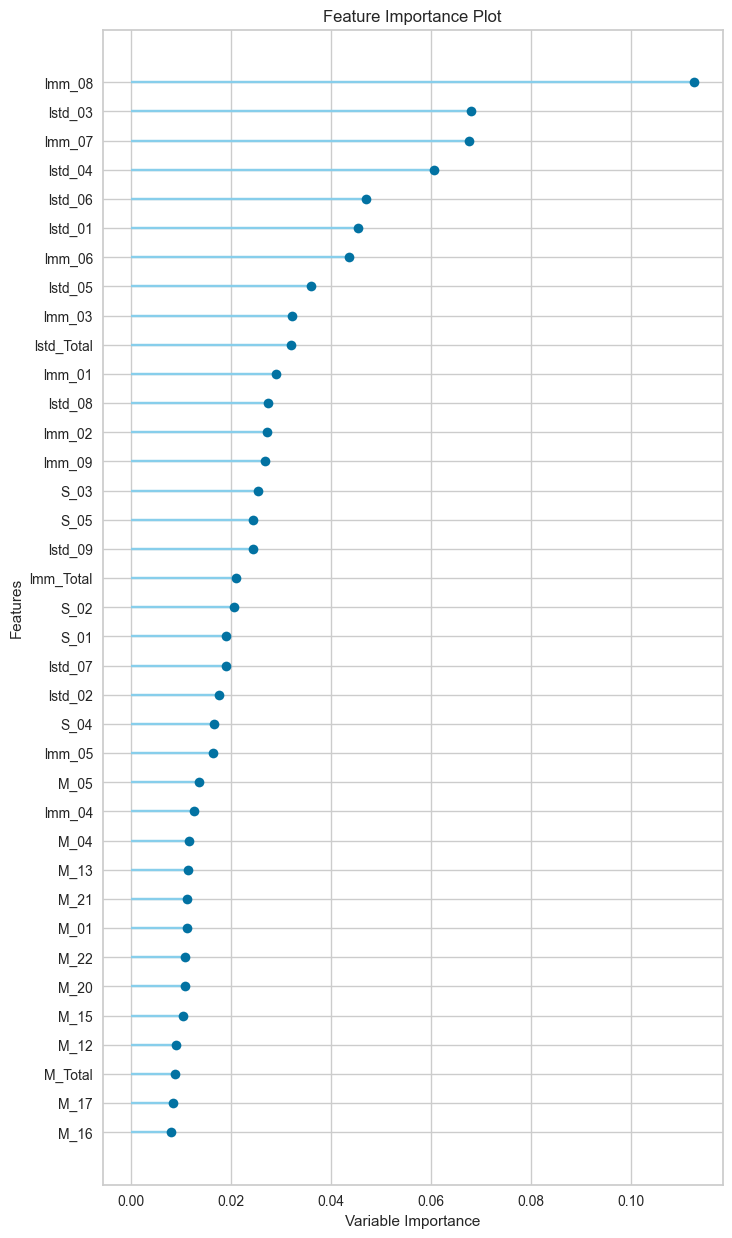

In [16]:
plot_model(estimator = best, plot = 'feature_all')

<AxesSubplot: >

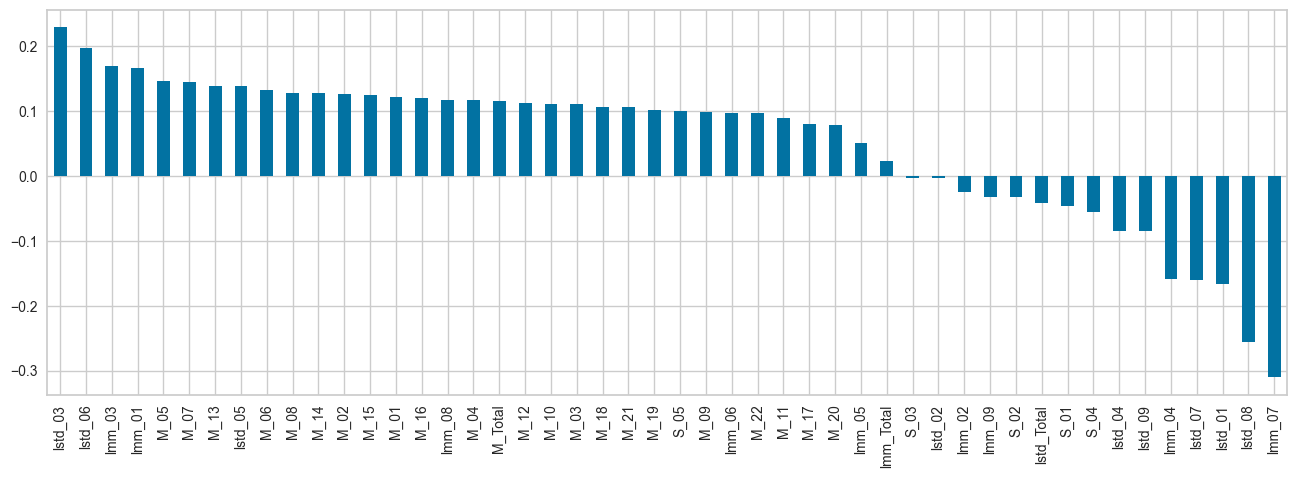

In [17]:
corr_matrix = train_df.corr()
corr = corr_matrix[train_df.columns[0]].sort_values(ascending=False)[1:]
corr.plot.bar(figsize = (16, 5))

<AxesSubplot: >

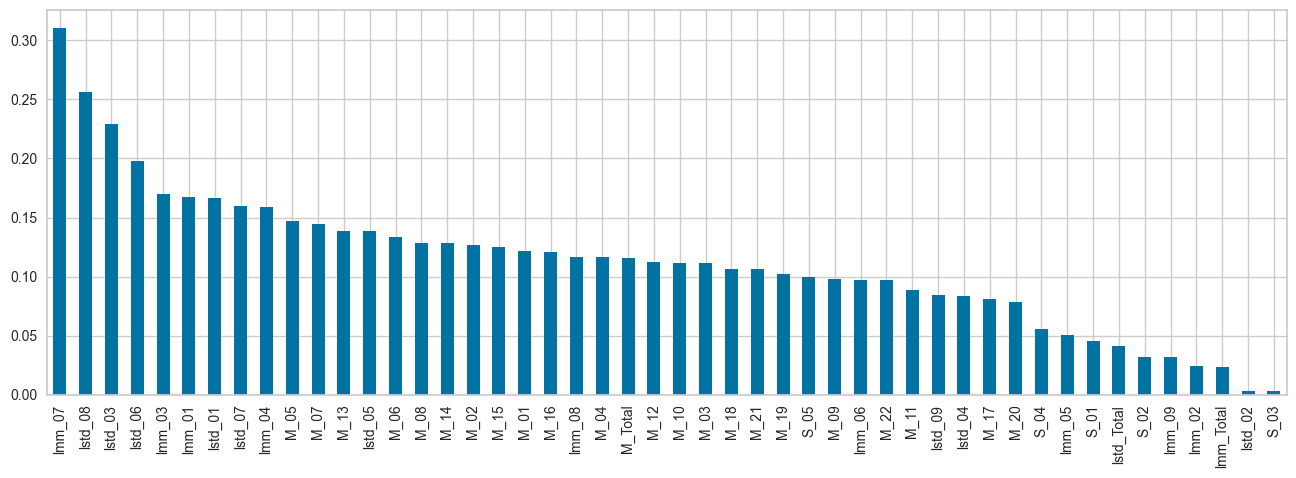

In [18]:
corr_matrix = train_df.corr()
corr = abs(corr_matrix[train_df.columns[0]]).sort_values(ascending=False)[1:]
corr.plot.bar(figsize = (16, 5))

In [19]:
prediction = predict_model(best, data=test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,10.2733,189.9263,13.7814,-0.2176,0.8408,1.3211


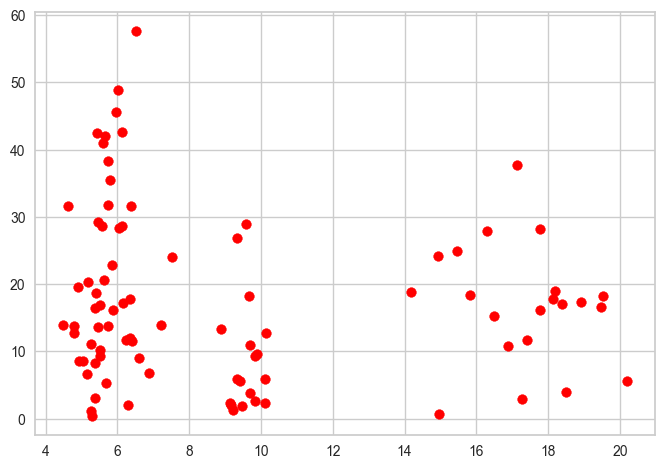

In [20]:
plt.scatter(prediction['lstd_03'],prediction['error'],c='red')

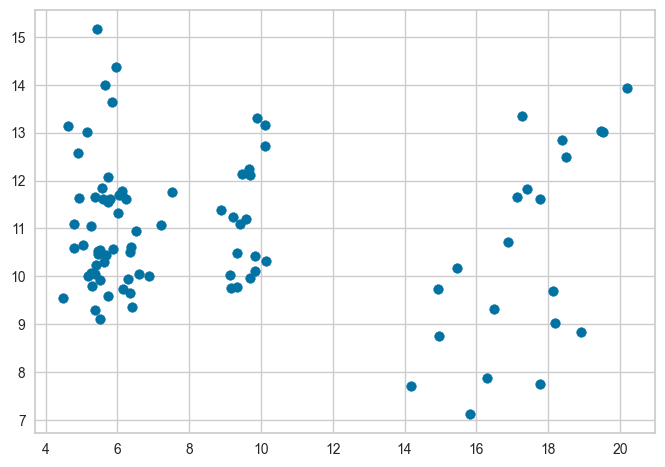

In [21]:
plt.scatter(prediction['lstd_03'],prediction['Label'])

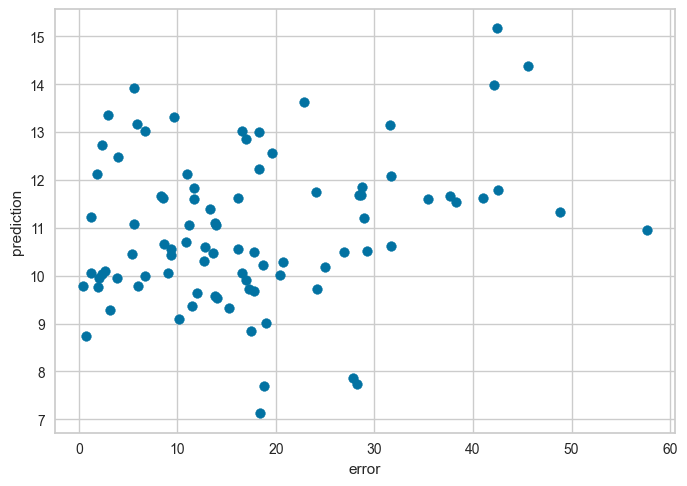

In [22]:
plt.scatter(prediction['error'],prediction['Label'])
plt.xlabel("error")
plt.ylabel("prediction")
plt.show()